# Tutorial

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os

from core.masking import get_padding_mask
from core.astromer import get_ASTROMER, train
from core.data  import (create_dataset, 
                        pretraining_records)

# This tutorial runs only in early mode. For the optimized code use train.py
# OTHERWISE you can comment the next ljupyine and reset the kernel before the finetuning
tf.config.run_functions_eagerly(True)

%load_ext autoreload
%autoreload 2

In [2]:
source = './data/raw_data/MACHO/' # lightcurves folder
metadata = 'data/raw_data/MACHO/MACHO_dataset.dat' # metadata file
target = 'data/records/macho2/' # where records will be stored

### Metadata frame sample

In [3]:
meta = pd.read_csv(metadata)
meta = meta[meta.N > 100]

### Lightcurve frame sample

In [45]:
lc_df = pd.read_csv(os.path.join(source,  meta['Path'].sample(1).values[0]))
lc_df.head()

,mjd,mag,errmag
0,48895.485336,-7.515,0.005
1,48895.500625,-7.498,0.005
2,49156.519468,-7.513,0.015
3,49161.534711,-7.491,0.014
4,49162.469965,-7.465,0.013


### From .csv to .record 

In [3]:
# create_dataset(meta, source, target, max_lcs_per_record=1000)

### Loading Data

In [6]:
batch_size = 10
max_obs = 50

In [7]:
from core.data import pretraining_records

train_batches = pretraining_records(os.path.join(target, 'train'), batch_size, max_obs=max_obs)
valid_batches = pretraining_records(os.path.join(target, 'val'), batch_size, max_obs=max_obs)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


In [9]:
sum([1 for _ in train_batches.unbatch()])

187848

In [10]:
sum([1 for _ in valid_batches.unbatch()])

93924

In [11]:
valid_batches = pretraining_records(os.path.join(target, 'test'), batch_size, max_obs=max_obs)
sum([1 for _ in valid_batches.unbatch()])

93924

### Visualizing Records

In [ ]:
n = 0
for batch in train_batches:
    print(batch['mask'].shape)
    break

# Classification Input

In [15]:
from core.data import classification_records

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
target = 'data/records/macho/' # where records will be stored

In [8]:
dataset = classification_records(os.path.join(target, 'train'), batch_size=10, max_obs=100)
objects = pd.read_csv(os.path.join(target, 'objects.csv'))

tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.], shape=(101,), dtype=float32)


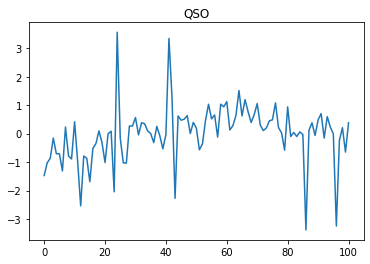

In [14]:
n = 0
for batch in dataset:
    plt.plot(batch['input'][n][1:-1])
    print(batch['mask'][n][1:-1])
    plt.title('{}'.format(list(objects['label'].values)[batch['label'][n]]))
    break

In [79]:
lens = [batch['times'] for batch in dataset.take(10)]